# Introduction to Regularization

Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty to the model's complexity. It discourages large coefficients in linear models by imposing constraints on the size of the weights.

---

## Table of Contents

1. [Why Regularization is Needed](#1-why-regularization-is-needed)
2. [L1 Regularization: Lasso Regression](#2-l1-regularization-lasso-regression)
3. [L2 Regularization: Ridge Regression](#3-l2-regularization-ridge-regression)
4. [Elastic Net](#4-elastic-net)
5. [Implementing Regularization in Python](#5-implementing-regularization-in-python)
6. [Comparison of Regularization Techniques](#6-comparison-of-regularization-techniques)

---


## 1. Why Regularization is Needed

Without regularization, a linear model can become overly complex, fitting the noise in the training data, which leads to **overfitting**. Regularization methods (L1, L2) help control this by introducing a penalty for large weights, simplifying the model.

---

## 2. L1 Regularization: Lasso Regression

**Lasso (Least Absolute Shrinkage and Selection Operator)** introduces a penalty equal to the absolute value of the magnitude of the coefficients. This results in sparse models, where some coefficients are exactly zero, effectively performing feature selection.

**Lasso regression cost function:**

**J(θ) = MSE(θ) + λ Σ |θₖ|**

Where:
- **MSE(θ)**: Mean Squared Error
- **λ Σ |θₖ|**: The L1 regularization term (sum of absolute values of the coefficients)
- **λ**: The regularization parameter controlling the strength of the penalty.

---

## 3. L2 Regularization: Ridge Regression

**Ridge Regression** penalizes the sum of the squared values of the coefficients, which forces smaller but non-zero coefficients. This technique is effective for preventing overfitting but keeps all features in the model.

**Ridge regression cost function:**

**J(θ) = MSE(θ) + λ Σ θₖ²**

Where:
- **λ Σ θₖ²**: The L2 regularization term (sum of squared values of the coefficients).

---

## 4. Elastic Net

**Elastic Net** combines L1 and L2 penalties, controlling both the sparsity of the model (like Lasso) and the size of the coefficients (like Ridge). It is useful when there are many correlated features.

**Elastic Net cost function:**

**J(θ) = MSE(θ) + λ₁ Σ |θₖ| + λ₂ Σ θₖ²**

Where:
- **λ₁**: Controls the L1 penalty
- **λ₂**: Controls the L2 penalty

---

## 5. Implementing Regularization in Python

In [1]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from scipy.stats import zscore

In [7]:
X = 3 * np.random.randn(100000,10)
y = 4 * X + 12 + np.random.randn(100000,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [8]:
# L2 Regularization (Ridge Regression)
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# L1 Regularization (Lasso Regression)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Elastic Net Regularization
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
elastic_mse = mean_squared_error(y_test, y_pred_elastic)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")
print(f"Elastic Net MSE: {elastic_mse}")

Ridge Regression MSE: 1.0080311772011283
Lasso Regression MSE: 1.0086979003756615
Elastic Net MSE: 1.0141304919729894


### Explanation of Parameters:
- alpha: The regularization strength (λ). Higher values of alpha increase the penalty on large coefficients, leading to more regularization.
- l1_ratio: This parameter controls the mix between Lasso and Ridge in Elastic Net. A value of 0 is pure Ridge, and a value of 1 is pure Lasso.

## 6. Comparison of Regularization Techniques

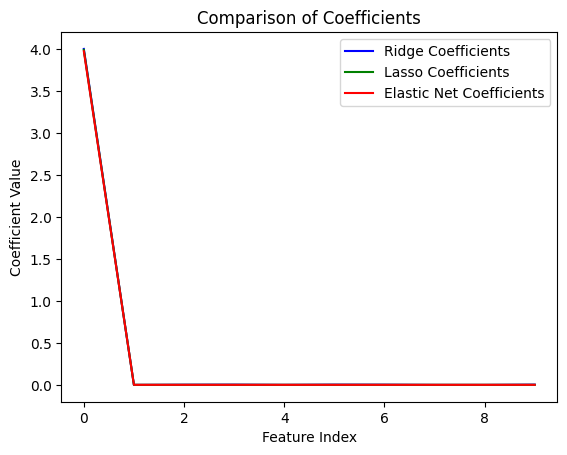

In [13]:
import matplotlib.pyplot as plt
plt.plot(ridge_reg.coef_[0], label='Ridge Coefficients', color='blue')
plt.plot(lasso_reg.coef_[0], label='Lasso Coefficients', color='green')
plt.plot(elastic_net.coef_[0], label='Elastic Net Coefficients', color='red')

plt.title('Comparison of Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()